# Telecom Churn case study
## Authors
### Kumaraguru Muthuraj
### Ahmad Elgohary

#### Objective - Identify the high valued per-paid customers who are about to churn and find the key indicators. Provide recommendations on how to reduce / avoid churning.

#### Assumptions
#### According to the problem description these are the assumptions
- Apply usage criteria for identifying churn
- Apply provided rule for identifying high value customers
- Understand good, action and churn phases accodring to definition

## Step 1. Load data, clean, impute, handle data quality, derive churn, extract HVC and get it ready for EDA

#### Import libraries and load data. Get a sense of the data, NaNs, empty values. Call it telecom_data_raw until high value customers are filtered.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
telecom_data_raw = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_data_raw.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [4]:
telecom_data_raw.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
telecom_data_raw.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

#### By looking at the columns, we can categorize columns as dates, keys and business importance.

In [6]:
#Separate columns by purpose
drop_date = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]
key_cols = ['mobile_number', 'circle_id']

drop_cols = drop_date + key_cols
telecom_data_raw = telecom_data_raw.drop(drop_cols, axis=1)

#Number of rows and columns in the raw data
n_rows = telecom_data_raw.shape[0]
n_cols = telecom_data_raw.shape[1]
print(telecom_data_raw.shape)


(99999, 212)


In [7]:
# Columns of somekind of business importance and these are categorical variables too
busns_vital_cols =  ['night_pck_user_6',
                     'night_pck_user_7',
                     'night_pck_user_8',
                     'night_pck_user_9',
                     'fb_user_6',
                     'fb_user_7',
                     'fb_user_8',
                     'fb_user_9'
                    ]

#### Extract all numeric columns

In [8]:
#Get some util function to extract all numeric columns
def getNumericColumns(df):
    numeric_columns = []
    allCols = key_cols + drop_date + busns_vital_cols
    for col in df.columns:
        if col not in allCols:
            numeric_columns.append(col)
    return numeric_columns

numeric_columns = getNumericColumns(telecom_data_raw)
print(numeric_columns)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', '

#### Handle missing, NaN values

In [9]:
# Util - print missing value ratio in each column
def printPercentOfMissingValues(df):
    lst = df.isnull().sum() * 100 / n_rows
    print(lst.sort_values())
    return

printPercentOfMissingValues(telecom_data_raw)


sep_vbc_3g             0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_6            0.000000
last_day_rch_amt_9     0.000000
last_day_rch_amt_8     0.000000
last_day_rch_amt_7     0.000000
last_day_rch_amt_6     0.000000
max_rech_amt_9         0.000000
max_rech_amt_8         0.000000
max_rech_amt_7         0.000000
max_rech_amt_6         0.000000
total_rech_amt_9       0.000000
total_rech_amt_8       0.000000
total_rech_amt_7       0.000000
total_rech_amt_6       0.000000
total_rech_num_9       0.000000
total_rech_num_8       0.000000
total_rech_num_7       0.000000
total_rech_num_6       0.000000
total_ic_mou_9         0.000000
total_ic_mou_8         0.000000
total_ic_mou_7         0.000000
total_ic_mou_6         0.000000
jun_vbc_3g             0.000000
total_og_mou_9         0.000000
total_og_mou_8         0.000000
vol_2g_mb_8            0.000000
total_og_mou_7         0.000000
vol_2g_mb_9            0.000000
vol_3g_mb_7            0.000000
jul_vbc_3g             0.000000
aug_vbc_

#### Check the content of recharge columns

In [10]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_data_raw[recharge_cols].describe(include='all')


total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

#### Impute numeric empty values with zeros

In [11]:
#These columns have minumum value as 1 and hence to 
#distinguish the corresponding nulls - NO RECHARGE, we can set 0
#The rest of the columns already have 0.
def imputeWithZeroValues(df):
    impute_zero_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
                        ]

    df[impute_zero_cols] = df[impute_zero_cols].apply(lambda x: x.fillna(0))
    return

imputeWithZeroValues(telecom_data_raw)

In [12]:
printPercentOfMissingValues(telecom_data_raw)

sep_vbc_3g             0.000000
max_rech_data_9        0.000000
max_rech_data_8        0.000000
max_rech_data_7        0.000000
max_rech_data_6        0.000000
total_rech_data_9      0.000000
total_rech_data_8      0.000000
total_rech_data_7      0.000000
total_rech_data_6      0.000000
last_day_rch_amt_9     0.000000
last_day_rch_amt_8     0.000000
last_day_rch_amt_7     0.000000
last_day_rch_amt_6     0.000000
max_rech_amt_9         0.000000
max_rech_amt_8         0.000000
max_rech_amt_7         0.000000
max_rech_amt_6         0.000000
total_rech_amt_9       0.000000
total_og_mou_8         0.000000
total_og_mou_9         0.000000
jun_vbc_3g             0.000000
total_ic_mou_6         0.000000
total_ic_mou_7         0.000000
total_ic_mou_8         0.000000
av_rech_amt_data_6     0.000000
total_ic_mou_9         0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_re

#### Replace NaN values in categorical values with -1
#### Only those business value columns are categorical

In [13]:
# -1 will indicate the category of NaNs
telecom_data_raw[busns_vital_cols] = telecom_data_raw[busns_vital_cols].apply(lambda x: x.fillna(-1))

In [14]:
printPercentOfMissingValues(telecom_data_raw)
print(telecom_data_raw.shape)

sep_vbc_3g             0.000000
last_day_rch_amt_7     0.000000
last_day_rch_amt_8     0.000000
last_day_rch_amt_9     0.000000
total_rech_data_6      0.000000
total_rech_data_7      0.000000
total_rech_data_8      0.000000
total_rech_data_9      0.000000
max_rech_data_6        0.000000
max_rech_data_7        0.000000
max_rech_data_8        0.000000
max_rech_data_9        0.000000
av_rech_amt_data_6     0.000000
av_rech_amt_data_7     0.000000
av_rech_amt_data_8     0.000000
av_rech_amt_data_9     0.000000
last_day_rch_amt_6     0.000000
max_rech_amt_9         0.000000
max_rech_amt_8         0.000000
max_rech_amt_7         0.000000
total_og_mou_8         0.000000
total_og_mou_9         0.000000
jun_vbc_3g             0.000000
total_ic_mou_6         0.000000
total_ic_mou_7         0.000000
total_ic_mou_8         0.000000
total_ic_mou_9         0.000000
vol_2g_mb_6            0.000000
total_rech_num_6       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_re

#### Drop all the columns that have 70+ percentage NaN values.

In [15]:
# Lets drop the columns of the telecom_data with with 70% NaN values.
thresh = len(telecom_data_raw) * 0.70
telecom_data_raw.dropna(thresh = thresh, axis = 1, inplace = True)
print(telecom_data_raw.shape)


(99999, 196)


#### We are left with only a few columns with missing values

In [16]:
printPercentOfMissingValues(telecom_data_raw)

sep_vbc_3g            0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
last_day_rch_amt_9    0.000000
total_rech_data_6     0.000000
total_rech_data_7     0.000000
total_rech_data_8     0.000000
total_rech_data_9     0.000000
max_rech_data_6       0.000000
max_rech_data_7       0.000000
max_rech_data_8       0.000000
max_rech_data_9       0.000000
av_rech_amt_data_6    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_9    0.000000
last_day_rch_amt_6    0.000000
max_rech_amt_9        0.000000
max_rech_amt_8        0.000000
max_rech_amt_7        0.000000
total_og_mou_8        0.000000
total_og_mou_9        0.000000
jun_vbc_3g            0.000000
total_ic_mou_6        0.000000
total_ic_mou_7        0.000000
total_ic_mou_8        0.000000
total_ic_mou_9        0.000000
vol_2g_mb_6           0.000000
total_rech_num_6      0.000000
total_rech_num_8      0.000000
total_rech_num_9      0.000000
total_rech_amt_6      0.000000
total_re

#### Impute the rest of the columns' missing values with mode

In [17]:
def imputeValuesWithMode(df):
    lst = df.isnull().sum() * 100 / n_rows
    cols = list(zip(lst, lst.index))
    for col in cols:
        if col[0] > 0:
            df[col[1]] = df[col[1]].fillna(df[col[1]].mode()[0])
    return

imputeValuesWithMode(telecom_data_raw)

#### Good to go, no missing values

In [18]:
printPercentOfMissingValues(telecom_data_raw)

loc_og_t2o_mou        0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
isd_ic_mou_7          0.0
total_rech_num_9      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
total_rech_amt_6      0.0
isd_ic_mou_6          0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8

In [19]:
## ALl columns have values filled-in
telecom_data_raw.shape

(99999, 196)

## Retain only high value customers

#### Calculate total data recharge amount. Rules provided in problem statement.

In [20]:
# June and July total data recharge amount = number of recharges * average recharge amount
telecom_data_raw['total_data_recharg_6'] = telecom_data_raw.total_rech_data_6 * telecom_data_raw.av_rech_amt_data_6
telecom_data_raw['total_data_recharg_7'] = telecom_data_raw.total_rech_data_7 * telecom_data_raw.av_rech_amt_data_7

In [21]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_data_raw['total_amt_6'] = telecom_data_raw.total_rech_amt_6 + telecom_data_raw.total_data_recharg_6
telecom_data_raw['total_amt_7'] = telecom_data_raw.total_rech_amt_7 + telecom_data_raw.total_data_recharg_7

In [22]:
# calculate average recharge done by customer in June and July
telecom_data_raw['amt_avg_6and7'] = (telecom_data_raw.total_amt_6 + telecom_data_raw.total_amt_7)/2

In [23]:
s70thPercentile = telecom_data_raw.amt_avg_6and7.quantile(0.7)

# look at the 70th percentile recharge amount
print("Total recharge amount at 70th percentile: {0}".format(s70thPercentile))

Total recharge amount at 70th percentile: 478.0


#### As mentioned in the problem statement, we get 30K records for HVC
#### Call it telecom_data filtered out of telecom_data_raw

In [24]:
# retain only those customers who have recharged more than 70th percentile
telecom_data = telecom_data_raw.loc[telecom_data_raw.amt_avg_6and7 >= s70thPercentile, :]
telecom_data = telecom_data.reset_index(drop=True)
telecom_data.shape

(30001, 201)

In [25]:
# delete variables created to filter high-value customers
telecom_data = telecom_data.drop(['total_data_recharg_6', 'total_data_recharg_7',
                                   'total_amt_6', 'total_amt_7', 'amt_avg_6and7'], axis=1)
telecom_data.shape

(30001, 196)

### Derive churn column based on rules mentioned in the problem statement

In [26]:
#Util function that adds up all the mentioned fields and checks if its 0 or 1.
#Accordingly returns not churned or churned
def ret0or1(custData):
    sum = custData.total_ic_mou_9 + custData.total_og_mou_9 + custData.vol_2g_mb_9 + custData.vol_3g_mb_9
    if sum == 0:
        return 1
    return 0

#Util function to tag churned customers. Filters out the columns ending with _9.
#Converts the 'churn' column to category and prints the percentage of churned vs loyal customers
def deriveChurnColumnAndTag(df):
    # create churn variable: those who have not used either calls or internet in the month of 
    # September are customers who have churned

    # 0 - not churn, 1 - churn
    df['churn'] = df.apply(ret0or1, axis=1)
    
    
    # delete all variables relating to 9th month
    df = df.filter(regex='[^9]$', axis=1)
    
    # change data type to category
    df.churn = df.churn.astype("category")

    # print churn ratio
    print("Churn Ratio:")
    print(df.churn.value_counts()*100 / df.shape[0])
    
    return df

In [27]:
telecom_data = deriveChurnColumnAndTag(telecom_data)

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


#### Since the action month has been called out as a period when the customers actually show change in behavior, we want to find the difference between August and the previous months. We create a difference column for august and the previous months for all column sets that end with 6, 7 and 8

In [28]:
telecom_data['diff_arpu'] = telecom_data.arpu_8 - ((telecom_data.arpu_6 + telecom_data.arpu_7)/2)

telecom_data['diff_onnet_mou'] = telecom_data.onnet_mou_8 - ((telecom_data.onnet_mou_6 + telecom_data.onnet_mou_7)/2)

telecom_data['diff_offnet_mou'] = telecom_data.offnet_mou_8 - ((telecom_data.offnet_mou_6 + telecom_data.offnet_mou_7)/2)

telecom_data['diff_roam_ic_mou'] = telecom_data.roam_ic_mou_8 - ((telecom_data.roam_ic_mou_6 + telecom_data.roam_ic_mou_7)/2)

telecom_data['diff_roam_og_mou'] = telecom_data.roam_og_mou_8 - ((telecom_data.roam_og_mou_6 + telecom_data.roam_og_mou_7)/2)

telecom_data['diff_loc_og_mou'] = telecom_data.loc_og_mou_8 - ((telecom_data.loc_og_mou_6 + telecom_data.loc_og_mou_7)/2)

telecom_data['diff_std_og_mou'] = telecom_data.std_og_mou_8 - ((telecom_data.std_og_mou_6 + telecom_data.std_og_mou_7)/2)

telecom_data['diff_isd_og_mou'] = telecom_data.isd_og_mou_8 - ((telecom_data.isd_og_mou_6 + telecom_data.isd_og_mou_7)/2)

telecom_data['diff_spl_og_mou'] = telecom_data.spl_og_mou_8 - ((telecom_data.spl_og_mou_6 + telecom_data.spl_og_mou_7)/2)

telecom_data['diff_total_og_mou'] = telecom_data.total_og_mou_8 - ((telecom_data.total_og_mou_6 + telecom_data.total_og_mou_7)/2)

telecom_data['diff_loc_ic_mou'] = telecom_data.loc_ic_mou_8 - ((telecom_data.loc_ic_mou_6 + telecom_data.loc_ic_mou_7)/2)

telecom_data['diff_std_ic_mou'] = telecom_data.std_ic_mou_8 - ((telecom_data.std_ic_mou_6 + telecom_data.std_ic_mou_7)/2)

telecom_data['diff_isd_ic_mou'] = telecom_data.isd_ic_mou_8 - ((telecom_data.isd_ic_mou_6 + telecom_data.isd_ic_mou_7)/2)

telecom_data['diff_spl_ic_mou'] = telecom_data.spl_ic_mou_8 - ((telecom_data.spl_ic_mou_6 + telecom_data.spl_ic_mou_7)/2)

telecom_data['diff_total_ic_mou'] = telecom_data.total_ic_mou_8 - ((telecom_data.total_ic_mou_6 + telecom_data.total_ic_mou_7)/2)

telecom_data['diff_total_rech_num'] = telecom_data.total_rech_num_8 - ((telecom_data.total_rech_num_6 + telecom_data.total_rech_num_7)/2)

telecom_data['diff_total_rech_amt'] = telecom_data.total_rech_amt_8 - ((telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_7)/2)

telecom_data['diff_max_rech_amt'] = telecom_data.max_rech_amt_8 - ((telecom_data.max_rech_amt_6 + telecom_data.max_rech_amt_7)/2)

telecom_data['diff_total_rech_data'] = telecom_data.total_rech_data_8 - ((telecom_data.total_rech_data_6 + telecom_data.total_rech_data_7)/2)

telecom_data['diff_max_rech_data'] = telecom_data.max_rech_data_8 - ((telecom_data.max_rech_data_6 + telecom_data.max_rech_data_7)/2)

telecom_data['diff_av_rech_amt_data'] = telecom_data.av_rech_amt_data_8 - ((telecom_data.av_rech_amt_data_6 + telecom_data.av_rech_amt_data_7)/2)

telecom_data['diff_vol_2g_mb'] = telecom_data.vol_2g_mb_8 - ((telecom_data.vol_2g_mb_6 + telecom_data.vol_2g_mb_7)/2)

telecom_data['diff_vol_3g_mb'] = telecom_data.vol_3g_mb_8 - ((telecom_data.vol_3g_mb_6 + telecom_data.vol_3g_mb_7)/2)

In [29]:
# Let's look at summary of one of the difference variables
# There is a negative value in the average figure.
telecom_data['diff_vol_2g_mb'].describe()

count    30001.000000
mean       -19.896683
std        256.114926
min      -4740.925000
25%        -21.120000
50%          0.000000
75%          0.000000
max       8062.295000
Name: diff_vol_2g_mb, dtype: float64

In [30]:
telecom_data.shape

(30001, 173)

In [31]:
# Util block
# extract all names that end with 9
cols_end_9 = telecom_data_raw.filter(regex='9$', axis=1).columns

print('cols_end_9')
print(cols_end_9)

#['night_pck_user_6',
#'night_pck_user_7',
#'night_pck_user_8',
#'night_pck_user_9',
#'fb_user_6',
#'fb_user_7',
#'fb_user_8',
#'fb_user_9'
#]
# update num_cols and busns_vital_cols column name list
busns_vital_cols = [col for col in busns_vital_cols if col not in cols_end_9]
busns_vital_cols.append('churn')

print('busns_vital_cols')
print(busns_vital_cols)

numeric_cols = [col for col in telecom_data.columns if col not in busns_vital_cols]
print('numeric_cols')
print(numeric_cols)

cols_end_9
Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')
busns_vital_cols
['night_pck_use

## Step 2. Lets do some EDA and simple treatment of outliers

In [32]:
def doDistPlot(variable):
    sns.distplot(variable)
    print(variable.describe())
    return

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64


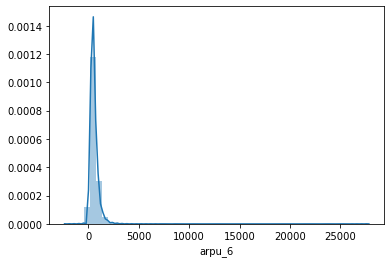

In [33]:
doDistPlot(telecom_data.arpu_6)

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


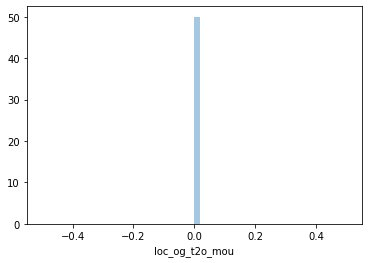

In [34]:
doDistPlot(telecom_data.loc_og_t2o_mou)

count    30001.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


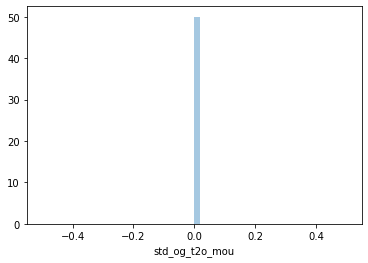

In [35]:
doDistPlot(telecom_data.std_og_t2o_mou)

count    30001.000000
mean       234.112539
std        458.448598
min          0.000000
25%         10.390000
50%         65.610000
75%        239.960000
max      10752.560000
Name: onnet_mou_8, dtype: float64


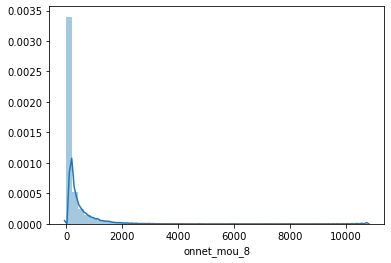

In [36]:
doDistPlot(telecom_data.onnet_mou_8)

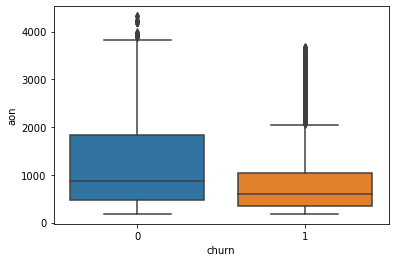

In [37]:
sns.boxplot(telecom_data.churn, telecom_data.aon)

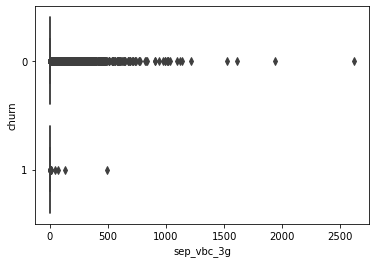

In [38]:
sns.boxplot(telecom_data.sep_vbc_3g, telecom_data.churn)

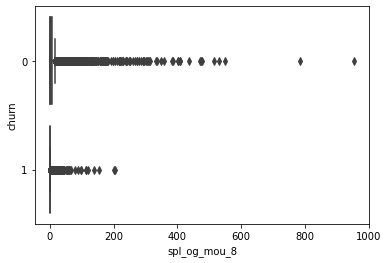

In [39]:
sns.boxplot(telecom_data.spl_og_mou_8, telecom_data.churn)

### Treat outliers by capping the numeric variables to a max / min or 3SDs

In [40]:
def treatOutliersWithMinMaxSetTo3SD(data):
    higherCap = data.mean() + data.std() * 3
    lowerCap = data.mean() - data.std() * 3
    data[data < lowerCap] = lowerCap
    data[data > higherCap] = higherCap
    return data

In [41]:
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 173 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   loc_og_t2o_mou         float64 
 1   std_og_t2o_mou         float64 
 2   loc_ic_t2o_mou         float64 
 3   arpu_6                 float64 
 4   arpu_7                 float64 
 5   arpu_8                 float64 
 6   onnet_mou_6            float64 
 7   onnet_mou_7            float64 
 8   onnet_mou_8            float64 
 9   offnet_mou_6           float64 
 10  offnet_mou_7           float64 
 11  offnet_mou_8           float64 
 12  roam_ic_mou_6          float64 
 13  roam_ic_mou_7          float64 
 14  roam_ic_mou_8          float64 
 15  roam_og_mou_6          float64 
 16  roam_og_mou_7          float64 
 17  roam_og_mou_8          float64 
 18  loc_og_t2t_mou_6       float64 
 19  loc_og_t2t_mou_7       float64 
 20  loc_og_t2t_mou_8       float64 
 21  loc_og_t2m_mou_6       float64 
 2

In [42]:
telecom_data.head(10)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   
5             0.0             0.0             0.0   977.020  2362.833   
6             0.0             0.0             0.0   363.987   486.558   
7             0.0             0.0             0.0   482.832   425.764   
8             0.0             0.0             0.0  1873.271   575.927   
9             0.0             0.0             0.0   978.077  1141.296   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   
5   409.230         0.00         0.00         0.00          0.00   
6   393.909       248.99       619.96       666.38         88.86   
7   229.769        86.39       118.88        80.44        232.36   
8   179.218      2061.69       881.43       156.91       1087.76   
9   706.020       135.14       119.59       102.69        479.31   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   
5          0.00          0.00           0.00           0.00           0.00   
6         50.58         97.81           0.00           0.00           0.00   
7        280.78        136.69           0.00           0.00           0.00   
8        258.29         68.18           0.00           0.00           0.00   
9        543.18        261.34           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   
5           0.00           0.00           0.00              0.00   
6           0.00           0.00           0.00             29.88   
7           0.00           0.00           0.00             86.39   
8           0.00           0.00           0.00            611.18   
9           0.00           0.00           0.00            118.44   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   
5              0.00              0.00              0.00              0.00   
6             17.33              9.48             33.76             16.19   
7            118.88             80.44            142.69            174.91   
8            154.56             29.31           1012.04            188.83   
9            103.68            102.69            238.58            196.5

In [43]:
# cap outliers in the numeric columns
telecom_data[numeric_cols] = telecom_data[numeric_cols].apply(treatOutliersWithMinMaxSetTo3SD, axis=0)

In [44]:
telecom_data.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         30001.0         30001.0         30001.0  30001.000000   
mean              0.0             0.0             0.0    548.190437   
std               0.0             0.0             0.0    356.617955   
min               0.0             0.0             0.0   -823.430558   
25%               0.0             0.0             0.0    309.865000   
50%               0.0             0.0             0.0    481.694000   
75%               0.0             0.0             0.0    699.943000   
max               0.0             0.0             0.0   1940.412206   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     550.814573    498.441171    244.520332    251.243475    216.618419   
std      361.120770    384.493319    371.616516    387.608598    354.670696   
min     -878.548639   -945.808000      0.000000      0.000000      0.000000   
25%      309.826000    231.473000     17.080000     16.030000     10.390000   
50%      480.943000    427.585000     84.580000     82.810000     65.610000   
75%      698.315000    661.491000    290.440000    290.240000    239.960000   
max     2000.113045   2014.483901   1639.726127   1707.801260   1609.458333   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     358.669154    362.067463    319.430161      12.324453       9.182973   
std      405.252913    413.547205    386.603835      41.750280      35.649995   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       71.610000     69.910000     46.740000       0.000000       0.000000   
50%      222.540000    220.030000    182.790000       0.000000       0.000000   
75%      487.940000    494.010000    438.890000       0.000000       0.000000   
max     1821.264635   1874.873834   1781.264570     245.016822     240.000212   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean        9.218402      20.590115      14.991576      14.900044   
std        35.301200      66.900217      52.507665      53.593739   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       234.876394     375.188122     308.453369     334.022642   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          73.430226         74.173410         67.990023        154.589624   
std          133.710618        136.275589        126.690738        199.750626   
min            0.000000          0.000000          0.000000          0.000000   
25%            4.380000          4.610000          2.530000         19.210000   
50%           24.330000         24.680000         20.730000         77.180000   
75%           77.980000         78.340000         72.040000        208.930000   
max          770.866765        807.252285        760.197938        913.593397   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean         155.166695        143.999326          5.467283          5.550102   
std          197.186851        190.418703         12.760515         12.820832   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.460000         13.090000          0.000000          0.000000   
50%           78.880000         67.760000          0.000000          0.100000   
75%   

In [45]:
telecom_data[busns_vital_cols]

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                   0.0               0.0               0.0        1.0   
1                  -1.0              -1.0              -1.0       -1.0   
2                  -1.0               0.0               0.0       -1.0   
3                  -1.0              -1.0              -1.0       -1.0   
4                  -1.0               0.0               0.0       -1.0   
...                 ...               ...               ...        ...   
29996               0.0               0.0               0.0        1.0   
29997               0.0               0.0               0.0        1.0   
29998               0.0               0.0               0.0        1.0   
29999              -1.0               0.0               0.0       -1.0   
30000               0.0               0.0               0.0        1.0   

       fb_user_7  fb_user_8 churn  
0            1.0        1.0     1  
1           -1.0       -1.0     1  
2            1.0        1.0     0  
3           -1.0       -1.0     0  
4            1.0        1.0     0  
...          ...        ...   ...  
29996        1.0        1.0     0  
29997        1.0        1.0     0  
29998        1.0        1.0     0  
29999        1.0        1.0     0  
30000        1.0        1.0     0  

[30001 rows x 7 columns]

## Step 3. Build the model

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Convert 'churn' to numeric. Models require it to be numeric.
telecom_data['churn'] = pd.to_numeric(telecom_data['churn'])

#### Split Train and Test

In [48]:
# divide data into train and test
TEST_SIZE = 0.25
X = telecom_data.drop("churn", axis = 1)
y = telecom_data.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 4, stratify = y)

In [49]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 172)
(22500,)
(7501, 172)
(7501,)


In [50]:
## Convert the categorical columns - 'busns_vital_cols' - to numeric 
## Group by the columns and get mean value of the 'churn' column (we split to -1, 0 and 1).
## Assign this mean to the category values and that becomes numeric equivalent.

#We need to concat 'churn' because we are going to get Mean of churn values after grouping by category values
data_train = pd.concat([X_train, y_train], axis=1)

# Get Mean of the categorical variables
print(data_train.groupby('night_pck_user_6').churn.mean())
print(data_train.groupby('night_pck_user_7').churn.mean())
print(data_train.groupby('night_pck_user_8').churn.mean())
print(data_train.groupby('fb_user_6').churn.mean())
print(data_train.groupby('fb_user_7').churn.mean())
print(data_train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64
fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64
fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64
fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64


In [51]:
# replace categories with aggregated values in each categorical column
category2NumericMap = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
                       'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
                       'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
                       'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
                       'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
                       'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
                      }
X_train.replace(category2NumericMap, inplace = True)
X_test.replace(category2NumericMap, inplace = True)

In [52]:
# Validate that all are converted to numeric
X_train[['night_pck_user_6' , 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8     fb_user_6  \
count      22500.000000      22500.000000      22500.000000  22500.000000   
mean           0.081378          0.081378          0.081378      0.081377   
std            0.016007          0.029882          0.056079      0.015835   
min            0.066797          0.051282          0.016194      0.067124   
25%            0.066797          0.055494          0.029023      0.067124   
50%            0.066797          0.055494          0.029023      0.067124   
75%            0.099165          0.115746          0.141108      0.099165   
max            0.099165          0.115746          0.141108      0.099165   

          fb_user_7     fb_user_8  
count  22500.000000  22500.000000  
mean       0.081378      0.081378  
std        0.029890      0.056835  
min        0.055082      0.024463  
25%        0.055082      0.024463  
50%        0.055082      0.066887  
75%        0.115746      0.141108  
max        0.115746      0.141108

## Step 3.a. PCA

In [53]:
# apply pca to train data
steps = [('step1_scaler', StandardScaler()), ('step2_pca', PCA())]
pca_PipeLine = Pipeline(steps)

In [54]:
#pca_PipeLine.fit(X_train)
pca_PipeLine.fit_transform(X_train)

array([[-5.32139053e+00, -1.30117267e+00,  3.45573264e-01, ...,
        -0.00000000e+00, -0.00000000e+00,  4.41889609e-14],
       [-7.02983559e+00,  4.54357021e+00,  3.22717257e+00, ...,
         1.28892546e-15, -1.16177275e-15,  2.64949416e-16],
       [ 1.26620988e+00, -5.20509112e+00, -3.64109810e+00, ...,
        -2.18995300e-15,  8.31729515e-15,  6.66073096e-17],
       ...,
       [-1.84857239e-01, -5.87444334e+00, -4.46625484e+00, ...,
         1.36798742e-18,  2.65684682e-17, -8.20551897e-19],
       [ 6.17667747e+00,  2.20348689e+00, -3.88471623e+00, ...,
        -1.07957532e-16, -4.25769779e-17,  1.38659053e-17],
       [ 2.38895723e+00,  6.25973404e+00, -2.09198906e+00, ...,
        -4.75132740e-17, -3.35831469e-17,  9.69594318e-18]])

In [55]:
#extract pca model from pipeline
pca = pca_PipeLine.named_steps['step2_pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4) * 100))

0       11.57
1       20.98
2       26.79
3       31.69
4       35.75
5       39.46
6       42.19
7       44.75
8       47.06
9       49.19
10      51.23
11      53.15
12      54.95
13      56.66
14      58.27
15      59.73
16      61.10
17      62.45
18      63.79
19      65.08
20      66.28
21      67.46
22      68.57
23      69.65
24      70.68
25      71.64
26      72.60
27      73.52
28      74.42
29      75.31
30      76.18
31      77.00
32      77.81
33      78.60
34      79.36
35      80.09
36      80.81
37      81.50
38      82.15
39      82.80
40      83.41
41      83.97
42      84.52
43      85.06
44      85.59
45      86.11
46      86.60
47      87.07
48      87.54
49      87.98
50      88.40
51      88.79
52      89.17
53      89.53
54      89.89
55      90.23
56      90.57
57      90.90
58      91.23
59      91.55
60      91.85
61      92.15
62      92.43
63      92.71
64      92.99
65      93.26
66      93.53
67      93.78
68      94.02
69      94.26
70      94.48
71    

### About 55 components explain 90% of variance
### About 73 components explain 95% of variance
### Lets pick 55 components and go ahead with Logistic Regression

## Step 3.b.  PCA and Logistic Regression

In [56]:
# create pipeline
PCA_VARS = 55
steps = [('step1_scaler', StandardScaler()),
         ("step2_pca", PCA(n_components = PCA_VARS)),
         ("step3_logistic_reg", LogisticRegression(class_weight='balanced'))]

pipeline = Pipeline(steps)

In [57]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8181333333333334

#### Evaluate on test data

In [58]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# AUC
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[5589 1302]
 [  86  524]]
Sensitivity:  0.86
Specificity:  0.81
AUC:  0.91


In [59]:
# Calculate class imbalance
y_train.value_counts() / len(y_train)

0    0.918622
1    0.081378
Name: churn, dtype: float64

## Step 3.c. PCA and Logistic Regression with Hyperparameter tuning
#### Note that class imbalance is handled simply with class_weight

In [60]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space, use only L2
params = {'pca__n_components': [55, 73], 'logistic__C': [0.1, 0.5, 1.0, 1.5], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [61]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1.0, 1.5],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [55, 73]},
             scoring='roc_auc', verbose=1)

In [62]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.855842      0.033829         0.046876        0.008579   
1       2.269934      0.034067         0.050266        0.013301   
2       1.911690      0.059405         0.065426        0.024336   
3       2.784154      0.138541         0.061037        0.009636   
4       1.740552      0.063374         0.055051        0.007397   
5       2.340546      0.043475         0.056650        0.007940   
6       1.741744      0.037499         0.049269        0.006233   
7       2.271329      0.204010         0.044282        0.014544   

  param_logistic__C param_logistic__penalty param_pca__n_components  \
0               0.1                      l2                      55   
1               0.1                      l2                      73   
2               0.5                      l2                      55   
3               0.5                      l2                      73   
4                 1                      l2                      55   
5                 1                      l2                      73   
6               1.5                      l2                      55   
7               1.5                      l2                      73   

                                              params  split0_test_score  \
0  {'logistic__C': 0.1, 'logistic__penalty': 'l2'...           0.893656   
1  {'logistic__C': 0.1, 'logistic__penalty': 'l2'...           0.898413   
2  {'logistic__C': 0.5, 'logistic__penalty': 'l2'...           0.894194   
3  {'logistic__C': 0.5, 'logistic__penalty': 'l2'...           0.898458   
4  {'logistic__C': 1.0, 'logistic__penalty': 'l2'...           0.893686   
5  {'logistic__C': 1.0, 'logistic__penalty': 'l2'...           0.897620   
6  {'logistic__C': 1.5, 'logistic__penalty': 'l2'...           0.893724   
7  {'logistic__C': 1.5, 'logistic__penalty': 'l2'...           0.898595   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.880862           0.893041           0.909379           0.882777   
1           0.884067           0.892336           0.910621           0.890706   
2           0.880954           0.892253           0.908325           0.882887   
3           0.884520           0.892205           0.909244           0.891139   
4           0.880935           0.892905           0.908972           0.882623   
5           0.884860           0.892147           0.909331           0.891020   
6           0.880084           0.892605           0.908919           0.883483   
7           0.884533           0.892012           0.908607           0.891070   

   mean_test_score  std_test_score  rank_test_score  
0         0.891943        0.010148                5  
1         0.895229        0.008950                1  
2         0.891723        0.009757                8  
3         0.895113        0.008335                2  
4         0.891824        0.010019                6  
5         0.894996        0.008235                3  
6         0.891763        0.010038                7  
7         0.894963        0.008148                4

In [63]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)
print("Best AUC: ", model.best_score_)

Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 73}
Best AUC:  0.8952285210652894


In [64]:
# predict churn on test data
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[5853 1038]
 [ 103  507]]
Sensitivity:  0.83
Specificity:  0.85
AUC:  0.91


### Good Sensitivity and Specificity score

## Step 3.d. Random Forest

In [65]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
# Using only Gini
params = {"criterion": ['gini'], "max_features": ['auto', 0.6]}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [66]:
# fit model
model.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_features': ['auto', 0.6]},
             scoring='roc_auc', verbose=1)

In [67]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)
print("Best AUC: ", model.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}
Best AUC:  0.9238192499355323


In [68]:
# predict churn on test data
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[6788  103]
 [ 321  289]]
Sensitivity:  0.47
Specificity:  0.99
AUC:  0.93


### Poor sensitivity with Random Forest. PCA with Logistic Regression was far better.

## Step 3.e. Since PCA + ML doesn't give interpretability, we go for the ML models Logistic Regression and Random Forest directly to get the important features

### Build Random Forest directly

In [69]:
# run a random forest model on train data
MAX_FEATURES = 10
random_forest = RandomForestClassifier(n_estimators=100, max_features = MAX_FEATURES, class_weight={0:0.1, 1: 0.9}, 
                                       oob_score=True, random_state=4, verbose=1)

In [70]:
# fit model
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=10,
                       oob_score=True, random_state=4, verbose=1)

In [71]:
# OOB Error
random_forest.oob_score_

0.9436444444444444

In [72]:
# predict churn on test data
y_pred = random_forest.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# AUC
y_pred_prob = random_forest.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob), 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6787  104]
 [ 319  291]]
Sensitivity:  0.48
Specificity:  0.98
AUC:  0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Feature importance in Random Forest

In [73]:
# predictors
features = telecom_data.drop('churn', axis=1).columns

# feature_importance
importance = random_forest.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Validating sum of importance - Is it 100? ", feature_importance.importance_percentage.sum())
feature_importance

Validating sum of importance - Is it 100?  100.0


variables  importance_percentage
0           total_ic_mou_8               5.207720
1             loc_ic_mou_8               4.471339
2         loc_ic_t2m_mou_8               4.417228
3             loc_og_mou_8               3.296794
4         loc_og_t2m_mou_8               3.020044
5           total_og_mou_8               2.364501
6       last_day_rch_amt_8               2.359138
7      diff_total_rech_amt               2.136002
8                diff_arpu               2.102118
9                   arpu_8               2.098851
10        loc_og_t2t_mou_8               1.772201
11        loc_ic_t2t_mou_8               1.695920
12     diff_total_rech_num               1.640493
13       diff_total_ic_mou               1.603496
14           roam_og_mou_8               1.585872
15            offnet_mou_8               1.562263
16          max_rech_amt_8               1.482431
17        total_rech_amt_8               1.450114
18            std_ic_mou_8               1.399731
19        diff_roam_og_mou               1.345266
20           roam_ic_mou_8               1.263820
21         max_rech_data_8               1.186116
22      av_rech_amt_data_8               1.162366
23         diff_loc_ic_mou               1.154589
24       diff_total_og_mou               1.108415
25         diff_std_og_mou               1.094389
26             vol_2g_mb_8               1.078826
27        diff_roam_ic_mou               1.001532
28       diff_max_rech_amt               0.991586
29        std_ic_t2m_mou_8               0.956709
30         diff_offnet_mou               0.931998
31             onnet_mou_8               0.822430
32          diff_onnet_mou               0.804458
33        night_pck_user_8               0.742041
34        loc_ic_t2f_mou_8               0.734279
35        total_rech_num_8               0.689840
36               fb_user_8               0.682742
37                     aon               0.662294
38            loc_ic_mou_7               0.650300
39       total_rech_data_8               0.613877
40         diff_loc_og_mou               0.607994
41         diff_spl_og_mou               0.598587
42         diff_std_ic_mou               0.596629
43                  arpu_6               0.555582
44          total_ic_mou_7               0.547476
45                  arpu_7               0.546502
46            loc_og_mou_7               0.542394
47            loc_ic_mou_6               0.539823
48        total_rech_amt_7               0.518287
49            std_og_mou_7               0.518131
50              aug_vbc_3g               0.506998
51          diff_vol_2g_mb               0.494775
52        total_rech_amt_6               0.492783
53        loc_ic_t2m_mou_7               0.482122
54          total_og_mou_7               0.472587
55            loc_og_mou_6               0.468794
56        loc_og_t2m_mou_7               0.467856
57      diff_max_rech_data               0.461661
58   diff_av_rech_amt_data               0.461552
59        loc_og_t2m_mou_6               0.448810
60        loc_og_t2f_mou_8               0.448420
61        loc_ic_t2m_mou_6               0.444160
62          total_ic_mou_6               0.444087
63        loc_ic_t2t_mou_6               0.444051
64        total_rech_num_7               0.436601
65            offnet_mou_6               0.431795
66            offnet_mou_7               0.427361
67          total_og_mou_6               0.420702
68             onnet_mou_7               0.416009
69            std_og_mou_8               0.414005
70        loc_og_t2t_mou_6               0.413654
71        total_rech_num_6               0.413448
72        loc_og_t2t_mou_7               0.407188
73        loc_ic_t2f_mou_7               0.398725
74        loc_ic_t2t_mou_7               0.393906
75            std_og_mou_6               0.383353
76             vol_3g_mb_8               0.379340
77      av_rech_amt_data_7               0.362684
78            std_ic_mou_7               0.360154
79        std_og_

### Step 3.f. We will use the top 30 features from Random Forest to feed the RFE for logistic regression model to get top 15. We will then use this top 15 features for the logistic regression model and check the scores.

In [74]:
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [75]:
top_features

0          total_ic_mou_8
1            loc_ic_mou_8
2        loc_ic_t2m_mou_8
3            loc_og_mou_8
4        loc_og_t2m_mou_8
5          total_og_mou_8
6      last_day_rch_amt_8
7     diff_total_rech_amt
8               diff_arpu
9                  arpu_8
10       loc_og_t2t_mou_8
11       loc_ic_t2t_mou_8
12    diff_total_rech_num
13      diff_total_ic_mou
14          roam_og_mou_8
15           offnet_mou_8
16         max_rech_amt_8
17       total_rech_amt_8
18           std_ic_mou_8
19       diff_roam_og_mou
20          roam_ic_mou_8
21        max_rech_data_8
22     av_rech_amt_data_8
23        diff_loc_ic_mou
24      diff_total_og_mou
25        diff_std_og_mou
26            vol_2g_mb_8
27       diff_roam_ic_mou
28      diff_max_rech_amt
29       std_ic_t2m_mou_8
Name: variables, dtype: object

### Apply RFE feature selection for Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logRegTemp = LogisticRegression()

from sklearn.feature_selection import RFE
TOP15 = 15
rfe = RFE(logRegTemp, TOP15)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train[top_features], y_train)

In [77]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True,  True])

In [78]:
list(zip(X_train[top_features], rfe.support_, rfe.ranking_))

[('total_ic_mou_8', False, 8),
 ('loc_ic_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', False, 6),
 ('loc_og_mou_8', False, 2),
 ('loc_og_t2m_mou_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('diff_total_rech_amt', False, 5),
 ('diff_arpu', False, 16),
 ('arpu_8', False, 11),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_ic_t2t_mou_8', True, 1),
 ('diff_total_rech_num', True, 1),
 ('diff_total_ic_mou', True, 1),
 ('roam_og_mou_8', True, 1),
 ('offnet_mou_8', False, 12),
 ('max_rech_amt_8', False, 3),
 ('total_rech_amt_8', False, 9),
 ('std_ic_mou_8', True, 1),
 ('diff_roam_og_mou', False, 14),
 ('roam_ic_mou_8', False, 10),
 ('max_rech_data_8', True, 1),
 ('av_rech_amt_data_8', True, 1),
 ('diff_loc_ic_mou', False, 7),
 ('diff_total_og_mou', False, 13),
 ('diff_std_og_mou', False, 15),
 ('vol_2g_mb_8', True, 1),
 ('diff_roam_ic_mou', True, 1),
 ('diff_max_rech_amt', True, 1),
 ('std_ic_t2m_mou_8', True, 1)]

In [79]:
col = X_train[top_features].columns[rfe.support_]

In [80]:
col

Index(['loc_ic_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'diff_total_rech_num',
       'diff_total_ic_mou', 'roam_og_mou_8', 'std_ic_mou_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'diff_roam_ic_mou',
       'diff_max_rech_amt', 'std_ic_t2m_mou_8'],
      dtype='object')

In [81]:
top_features = ['loc_ic_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
               'last_day_rch_amt_8', 'loc_ic_t2t_mou_8', 'diff_total_rech_num',
               'diff_total_ic_mou', 'roam_og_mou_8', 'std_ic_mou_8', 'max_rech_data_8',
               'av_rech_amt_data_8', 'vol_2g_mb_8', 'diff_roam_ic_mou',
               'diff_max_rech_amt', 'std_ic_t2m_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

## Step 3.g. Build Logistic Regression model directly

In [82]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

logistic = Pipeline(steps)

# hyperparameter space,  we are using both L1 and L2 for penalizing
params = {'logistic__C': [0.1, 0.5, 1.0, 1.5], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [83]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1.0, 1.5],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [84]:
# print best hyperparameters
print("Best hyperparameters: ", model.best_params_)
print("Best AUC: ", model.best_score_)

Best hyperparameters:  {'logistic__C': 1.5, 'logistic__penalty': 'l2'}
Best AUC:  0.882291172370041


In [85]:
# predict churn on test data
y_pred = model.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2))
print("Specificity: ", round(specificity, 2))

# AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob), 2))

[[5766 1125]
 [ 120  490]]
Sensitivity:  0.8
Specificity:  0.84
AUC:  0.89


## Step 3.h. Define the final model with coefficients and intercept

In [86]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [87]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [88]:
# coefficients
coefficients = logistic_model.coef_.reshape((TOP15, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [89]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  loc_ic_mou_8  loc_og_t2m_mou_8  total_og_mou_8  \
0  -1.564601     -0.940748         -0.416554        -0.21493   

   last_day_rch_amt_8  loc_ic_t2t_mou_8  diff_total_rech_num  \
0           -0.284423         -0.101219            -0.433092   

   diff_total_ic_mou  roam_og_mou_8  std_ic_mou_8  max_rech_data_8  \
0          -0.404703       0.295309     -0.162565         0.114633   

   av_rech_amt_data_8  vol_2g_mb_8  diff_roam_ic_mou  diff_max_rech_amt  \
0           -0.605818    -0.384558         -0.117603          -0.184978   

   std_ic_t2m_mou_8  
0         -0.068193

## Step 4. Business interpretation and recommendation to reduce churn of high value customers
- We observe that most of the indicators are from the 8th month where some activity of the customer indicates churn in the upcoming month. 
- All the coefficients, except roam_og_mou_8 and max_rech_data_8, are negative indicating that a decrease in the values of these features indicate that there is a correlation to churn. Increase in roam_og_mou_8 and max_rech_data_8 also indicate a correlation to churn.
- ### An increase in the following 2 feature values indicate that the expenditure of the customer is high and hence some kind of discount / package can be provided around these.

> roam_og_mou_8 - Roaming outgoing minutes of usage in 8th month.

> max_rech_data_8 - Maximum recharge data in 8th month.

- ### A decrease in the following feature values indicate that the customer is on the way to churn as his usage decreased. Some package can be provided intermittently to keep him active and spend more.

> loc_ic_mou_8 - Local incoming minutes of usage in 8th month.

> loc_og_t2m_mou_8 - Local outgoing to other operators in 8th month.

> total_og_mou_8 - Total outgoing minutes of usage in the 8th month.

> last_day_rch_amt_8 - Last day recharge amount in 8th month.

> loc_ic_t2t_mou_8 - Local incoming from same operator in 8th month.

> diff_total_rech_num - Derived field indicating recharge amount difference between 6+7 months and 8th

> diff_total_ic_mou - Derived field indicating total incoming minutes of usage difference between 6+7 months and 8th.

> std_ic_mou_8 - Std, incoming minutes of usage in 8th month.

> av_rech_amt_data_8 - Average recharge amount of data in 8th month.

> vol_2g_mb_8 - Volume of 2g data usage in 8th month.

> diff_roam_ic_mou - Roaming incoming minutes of usage difference between 6+7 months and 8th.

> diff_max_rech_amt - Maximum recharge amount difference between 6+7 months and 8th.

> std_ic_t2m_mou_8 -  Std incoming from other operators in 8th month. 




## END OF FILE